In [1]:
# Importing Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import torch
import pickle
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
# embedding_dir = "/home/andrewngo/Desktop/MLTracker/model_20220217192920"
embedding_dir = "/home/andrewngo/Desktop/MLTracker/model_CUC_20220311120344" # model folder
path = torch.load(embedding_dir + "/path.pt")

path_embedding = torch.load(embedding_dir + "/out_1.pt")
out_index_path = torch.load(embedding_dir + "/out_index_path_1.pt")

out_mal_train_val_dict = torch.load(embedding_dir + "/out_mal_train_val_1.pt")
out_mal_train_val_index_path = torch.load(embedding_dir + "/out_mal_train_val_index_path_1.pt")

out_mal_test_dict = torch.load(embedding_dir + "/out_mal_test_1.pt")
out_mal_test_index_path = torch.load(embedding_dir + "/out_mal_test_index_path_1.pt")

out_normal_dict = torch.load(embedding_dir + "/out_normal_1.pt")
out_normal_index_path = torch.load(embedding_dir + "/out_normal_index_path_1.pt")

labels = torch.load(embedding_dir + "/path_labels_1.pt")


model_metapath2vec = torch.load(embedding_dir + "/model.pt")





In [4]:
dir_graph = '/home/andrewngo/Desktop/MLTracker/graph_data_20220305160351'
computer2nodeid = torch.load(dir_graph + "/computer2nodeid.pt")
user2nodeid = torch.load(dir_graph + "/user2nodeid.pt")



# Random shuffling testing strategy with benign sample sampling from graph (Mentioned in paper)

In [5]:
out_mal_test_keys = out_mal_test_dict
out_mal_val_keys = out_mal_train_val_dict
out_normal_keys = out_normal_dict
seed = 40


# out_mal_test_keys = list(out_mal_test_dict.keys())
# out_mal_val_keys = list(out_mal_train_val_dict.keys())
# out_normal_keys = list(out_normal_dict.keys())

In [ ]:
# len(path_embedding.values[: int(len(path_embedding.values)/2)])
benign_path = path_embedding.values[:labels.count(0)]
malicious_path = path_embedding.values[labels.count(0):]
benign_path

training_sample = 100000
val_normal_sample = 5000
test_normal_sample = 5000

#validation + testing = 1 for easier code, the correct ratio value should be validation + testing + training = 1
validation_ratio = 0.5
test_ratio = 0.5

from numpy.random import permutation
np.random.seed(20)
perm = permutation(len(benign_path))
# normal_train_data_idx = 
normal_train_data_idx = perm[:training_sample]

perm = permutation(len(out_normal_keys))

perm_val = perm[:val_normal_sample]
perm_test = perm[val_normal_sample:(val_normal_sample+test_normal_sample)]


perm = permutation(len(malicious_path))
mal_val_data_idx = perm[:int(len(perm)*test_ratio)]
mal_test_data_idx = perm[int(len(perm)*test_ratio):]


# normal_train_data_idx
# normal_val_data_idx
# normal_test_data_idx
# mal_val_data_idx
# mal_test_data_idx

normal_train_data = np.asarray([benign_path[i] for i in normal_train_data_idx])

out_test_keys_sample = [out_normal_keys[i] for i in perm_test]
normal_test_data = np.asarray([out_normal_dict[i].tolist() for i in out_test_keys_sample])

out_val_keys_sample = [out_normal_keys[i] for i in perm_val]
normal_val_data = np.asarray([out_normal_dict[i].tolist() for i in out_val_keys_sample])


mal_val_data = np.asarray([malicious_path[i] for i in mal_val_data_idx])
mal_test_data = np.asarray([malicious_path[i] for i in mal_test_data_idx])


# print(normal_train_data)
# Initializing a MinMax Scaler
scaler = MinMaxScaler()

# Fitting the train data to the scaler
data_scaled = scaler.fit(normal_train_data)




normal_train_data = data_scaled.transform(normal_train_data)
normal_val_data = data_scaled.transform(normal_val_data)
normal_test_data = data_scaled.transform(normal_test_data)
mal_val_data = data_scaled.transform(mal_val_data)
mal_test_data = data_scaled.transform(mal_test_data)

# normal_train_data

test_data = np.concatenate((normal_test_data,mal_test_data), axis=0)
val_data =  np.concatenate((normal_val_data, mal_val_data), axis=0)
labels_test = [0 for i in range(len(normal_test_data))] + [1 for i in range(len(mal_test_data))]
labels_val = [0 for i in range(len(normal_val_data))] + [1 for i in range(len(mal_val_data))]


# normal_train_data, normal_test_data, train_labels, test_labels = train_test_split(benign_path, , test_size = 0.2, random_state = 111)

In [690]:
(0.82+0.93+0.86+0.92+0.88)/5

0.882

In [695]:
(0.94+0.93+0.97+0.91+0.94)/5

0.938

# Random split testing with benign sampling on log file

In [6]:
len(path_embedding.values[: int(len(path_embedding.values)/2)])
benign_path = path_embedding.values[:labels.count(0)]
malicious_path = path_embedding.values[labels.count(0):]
benign_path

training_sample = 10000
val_normal_sample = 5000
test_normal_sample = 5000


#validation + testing = 1 for easier code, the correct ratio value should be validation + testing + training = 1
validation_ratio = 0.5
test_ratio = 0.5

from numpy.random import permutation
np.random.seed(20)
perm = permutation(len(out_normal_keys))
# normal_train_data_idx = 

perm_val = perm[:val_normal_sample]
perm_test = perm[val_normal_sample:(val_normal_sample+test_normal_sample)]
perm_train = perm[(val_normal_sample+test_normal_sample):(val_normal_sample+test_normal_sample+training_sample)]

perm = permutation(len(malicious_path))
mal_val_data_idx = perm[:int(len(perm)*test_ratio)]
mal_test_data_idx = perm[int(len(perm)*test_ratio):]


# normal_train_data_idx
# normal_val_data_idx
# normal_test_data_idx
# mal_val_data_idx
# mal_test_data_idx

out_train_keys_sample = [out_normal_keys[i] for i in perm_train]
normal_train_data = np.asarray([out_normal_dict[i].tolist() for i in out_train_keys_sample])

out_test_keys_sample = [out_normal_keys[i] for i in perm_test]
normal_test_data = np.asarray([out_normal_dict[i].tolist() for i in out_test_keys_sample])

out_val_keys_sample = [out_normal_keys[i] for i in perm_val]
normal_val_data = np.asarray([out_normal_dict[i].tolist() for i in out_val_keys_sample])

mal_val_data = np.asarray([malicious_path[i] for i in mal_val_data_idx])
mal_test_data = np.asarray([malicious_path[i] for i in mal_test_data_idx])


# print(normal_train_data)
# Initializing a MinMax Scaler
scaler = MinMaxScaler()

# Fitting the train data to the scaler
data_scaled = scaler.fit(normal_train_data)




normal_train_data = data_scaled.transform(normal_train_data)
normal_val_data = data_scaled.transform(normal_val_data)
normal_test_data = data_scaled.transform(normal_test_data)
mal_val_data = data_scaled.transform(mal_val_data)
mal_test_data = data_scaled.transform(mal_test_data)

# normal_train_data

test_data = np.concatenate((normal_test_data,mal_test_data), axis=0)
val_data =  np.concatenate((normal_val_data, mal_val_data), axis=0)
labels_test = [0 for i in range(len(normal_test_data))] + [1 for i in range(len(mal_test_data))]
labels_val = [0 for i in range(len(normal_val_data))] + [1 for i in range(len(mal_val_data))]


# normal_train_data, normal_test_data, train_labels, test_labels = train_test_split(benign_path, , test_size = 0.2, random_state = 111)

AttributeError: 'list' object has no attribute 'values'

# Split by day testing strategy

In [6]:
training_sample = 100000
val_normal_sample = 5000
test_normal_sample = 5000



# Randomly select normal sample for training, testing, validation sets
from numpy.random import permutation
np.random.seed(seed)
perm = permutation(len(out_normal_keys))




perm_val = perm[:val_normal_sample]
perm_test = perm[(val_normal_sample):(val_normal_sample+test_normal_sample)]
perm_train = perm[(val_normal_sample+test_normal_sample):(training_sample+val_normal_sample+test_normal_sample)]


# out_train_keys_sample = 
normal_train_data = np.asarray([out_normal_keys[i].tolist() for i in perm_train])


# out_test_keys_sample = 
normal_test_data = np.asarray([out_normal_keys[i].tolist() for i in perm_test])

# out_val_keys_sample = 
normal_val_data = np.asarray([out_normal_keys[i].tolist() for i in perm_val])


mal_val_data = np.asarray([i.tolist() for i in out_mal_train_val_dict])
mal_test_data = np.asarray([i.tolist() for i in out_mal_test_dict])






normal_train_data_path = [out_normal_index_path[i] for i in perm_train]
normal_test_data_path = [out_normal_index_path[i] for i in perm_test]
normal_val_data_path = [out_normal_index_path[i] for i in perm_val]

mal_val_data_path  = [out_mal_train_val_index_path[i] for i in out_mal_train_val_index_path]
mal_test_data_path = [out_mal_test_index_path[i] for i in out_mal_test_index_path]

scaler = MinMaxScaler()

# Fitting the train data to the scaler
data_scaled = scaler.fit(normal_train_data)




normal_train_data = data_scaled.transform(normal_train_data)
normal_val_data = data_scaled.transform(normal_val_data)
normal_test_data = data_scaled.transform(normal_test_data)
mal_val_data = data_scaled.transform(mal_val_data)
mal_test_data = data_scaled.transform(mal_test_data)

test_data = np.concatenate((normal_test_data,mal_test_data), axis=0)
val_data =  np.concatenate((normal_val_data, mal_val_data), axis=0)
val_data_path = normal_train_data_path + mal_val_data_path
test_data_path = normal_test_data_path + mal_test_data_path

labels_test = [0 for i in range(len(normal_test_data))] + [1 for i in range(len(mal_test_data))]
labels_val = [0 for i in range(len(normal_val_data))] + [1 for i in range(len(mal_val_data))]



In [7]:
# Train

In [8]:
print("Train Data: " + str(len(normal_train_data)))
print("Validation Normal: " + str(len(normal_val_data)))
print("Validation Malicious: " + str(len(mal_val_data)))
print("Test Normal: " + str(len(normal_test_data)))
print("Test Malicious: " + str(len(mal_test_data)))

Train Data: 100000
Validation Normal: 5000
Validation Malicious: 229
Test Normal: 5000
Test Malicious: 245


In [9]:
# # Initializing a MinMax Scaler
# scaler = MinMaxScaler()

# # Fitting the train data to the scaler
# data_scaled = scaler.fit(normal_train_data)
# normal_train_data = data_scaled.transform(normal_train_data)
# normal_test_data = data_scaled.transform(normal_test_data)

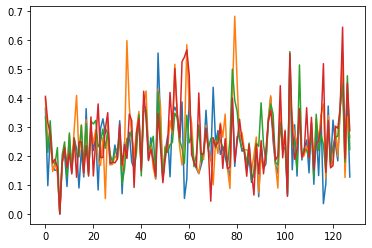

In [10]:
# plotting the first three normal data points
plt.plot(mal_test_data[0])
plt.plot(mal_test_data[1])
plt.plot(mal_test_data[3])
# plt.plot(mal_test_data[4])
plt.plot(mal_test_data[5])
# plt.plot(mal_test_data[2])

In [11]:
normal_test_data[4]

array([0.27774327, 0.21514998, 0.3142532 , 0.1802037 , 0.24550145,
       0.1733336 , 0.00095093, 0.20587733, 0.21705764, 0.15208752,
       0.3331457 , 0.21856484, 0.26626615, 0.23723738, 0.22844802,
       0.31473532, 0.13357274, 0.33336328, 0.13626579, 0.35789771,
       0.20099188, 0.30690807, 0.16767599, 0.22903807, 0.30579608,
       0.22899677, 0.29033629, 0.23092727, 0.26570632, 0.21047413,
       0.20774964, 0.28037053, 0.11018472, 0.19130986, 0.16196493,
       0.28390631, 0.23527807, 0.19293491, 0.21190299, 0.33412746,
       0.11738113, 0.37328425, 0.34557906, 0.19128022, 0.2353395 ,
       0.18748908, 0.11970085, 0.39759994, 0.23960508, 0.1168793 ,
       0.22870445, 0.22400215, 0.23921698, 0.2875028 , 0.37320018,
       0.34785928, 0.18848935, 0.25760162, 0.1791426 , 0.41016584,
       0.30685607, 0.30326734, 0.17921479, 0.1607072 , 0.33498014,
       0.19785297, 0.20353972, 0.29866984, 0.22573907, 0.26820026,
       0.28939655, 0.23969588, 0.23018216, 0.31689626, 0.23794

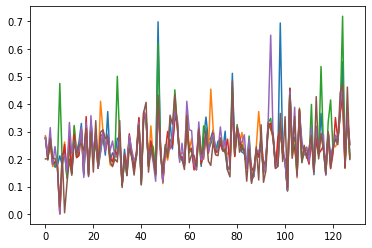

In [12]:
plt.plot(normal_test_data[0])
plt.plot(normal_test_data[1])
plt.plot(normal_test_data[2])
plt.plot(normal_test_data[3])
plt.plot(normal_test_data[4])
plt.plot(normal_test_data[5])

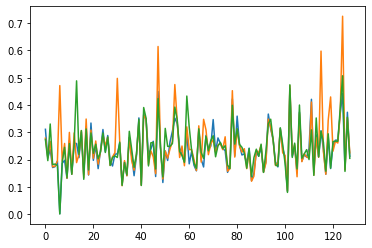

In [13]:
# plotting the first three anomaly data points
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

In [14]:
class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = Sequential([
                                Dense(128, activation='tanh'),
#                                 Dense(32, activation='relu'),
                                Dense(64, activation='tanh'),
#                                 Dense(8, activation='relu')
    ])

    self.decoder = Sequential([
                               Dense(64, activation='tanh'),
#                                Dense(32, activation='rel'),
                               Dense(128, activation='tanh'),
    ])

  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [15]:
# class Autoencoder(Model):
#   def __init__(self):
#     super(Autoencoder, self).__init__()
#     self.encoder = Sequential([
#                                 Dense(128, activation='tanh'),
#                                 Dense(64, activation='tanh'),
#                                 Dense(32, activation='tanh'),
#                                 Dense(16, activation='tanh'),
#                                 Dense(8, activation='tanh')
#     ])

#     self.decoder = Sequential([
#                                Dense(16, activation='tanh'),
#                                Dense(32, activation='tanh'),
#                                Dense(64, activation='tanh'),
#                                Dense(128, activation='tanh')
                            
#     ])

#   def call(self,x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

In [16]:
# Instantiating the Autoencoder
model = Autoencoder()

# creating an early_stopping
# early_stopping = EarlyStopping(monitor='val_loss',
#                                patience = 20,
#                                mode = 'min')
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1, 
    mode='min',
    restore_best_weights=True)
# Compiling the model
model.compile(optimizer = 'adam',
              loss = 'mae')

# model.compile(optimizer = 'adam',
#               loss = 'mse')

In [17]:
len(normal_train_data)

100000

In [18]:
# Training the model
validate = np.concatenate((normal_train_data, normal_val_data), axis=0)

history = model.fit(normal_train_data,normal_train_data,
                    epochs = 500,
                    batch_size = 128,
                    validation_data = (validate,validate),
                    shuffle = True,
                    callbacks = [early_stopping])

Epoch 1/500
782/782 [==============================] - 2s 2ms/step - loss: 0.0235 - val_loss: 0.0174
Epoch 2/500
782/782 [==============================] - 1s 2ms/step - loss: 0.0165 - val_loss: 0.0160
Epoch 3/500
782/782 [==============================] - 1s 2ms/step - loss: 0.0154 - val_loss: 0.0151
Epoch 4/500
782/782 [==============================] - 1s 1ms/step - loss: 0.0146 - val_loss: 0.0142
Epoch 5/500
782/782 [==============================] - 1s 1ms/step - loss: 0.0139 - val_loss: 0.0137
Epoch 6/500
782/782 [==============================] - 1s 2ms/step - loss: 0.0132 - val_loss: 0.0129
Epoch 7/500
782/782 [==============================] - 1s 2ms/step - loss: 0.0127 - val_loss: 0.0126
Epoch 8/500
782/782 [==============================] - 1s 2ms/step - loss: 0.0122 - val_loss: 0.0122
Epoch 9/500
782/782 [==============================] - 1s 2ms/step - loss: 0.0118 - val_loss: 0.0114
Epoch 10/500
782/782 [==============================] - 1s 2ms/step - loss: 0.0114 - val_lo

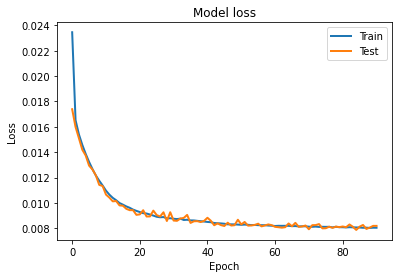

In [19]:
plt.plot(history.history['loss'], linewidth=2, label='Train')
plt.plot(history.history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [20]:
# predictions for normal test data points
encoder_out = model.encoder(normal_val_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()


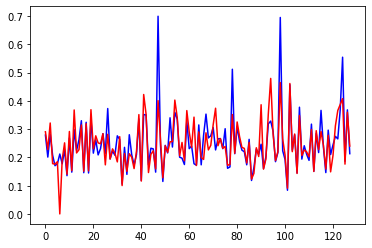

In [21]:
# plotting normal test data point and its predictiction by the autoencoder
plt.plot(normal_test_data[0], 'b')
plt.plot(decoder_out[0], 'r')

In [22]:
# predictions for anomaly test data points
encoder_out_a = model.encoder(mal_test_data).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

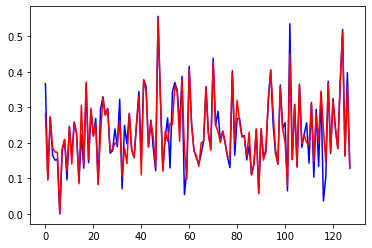

In [23]:
# plotting anomaly test data point and its predictiction by the autoencoder
plt.plot(mal_test_data[0], 'b')
plt.plot(decoder_out_a[0], 'r')

In [24]:
# reconstruction loss for anomaly test data
reconstructions_a = model.predict(val_data)
val_loss = tf.keras.losses.mae(reconstructions_a, val_data)

# Plotting histogram for recontruction loss for anomaly test data
# plt.hist(train_loss_a, bins = 20)

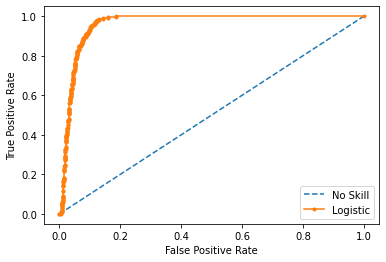

In [25]:
# feature scaling
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
prob_val = (val_loss-min(val_loss))/(max(val_loss)-min(val_loss))

fpr, tpr, thresholds = roc_curve(labels_val,prob_val)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

Best Threshold=0.203942, G-Mean=0.928


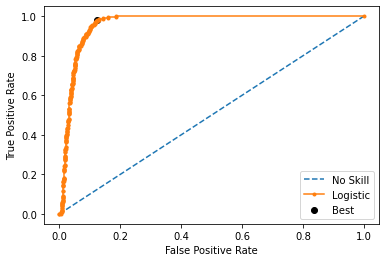

In [26]:
from numpy import sqrt
from numpy import argmax
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()
threshold = thresholds[ix]

In [27]:
auc = roc_auc_score(labels_val, prob_val, average=None)
auc

0.960522270742358

In [28]:
# Number of correct predictions for Normal test data  


In [29]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
pred_val = [0 if prob_val[i] < threshold else 1 for i in range(len(prob_val))]
print(roc_auc_score(labels_val, pred_val, average=None))
print(classification_report(labels_val, pred_val, labels=[0, 1], target_names=['benign', 'malicious']))
print(confusion_matrix(labels_val, pred_val))

0.9291663755458516
              precision    recall  f1-score   support

      benign       1.00      0.88      0.93      5000
   malicious       0.27      0.98      0.42       229

    accuracy                           0.88      5229
   macro avg       0.63      0.93      0.68      5229
weighted avg       0.97      0.88      0.91      5229

[[4379  621]
 [   4  225]]


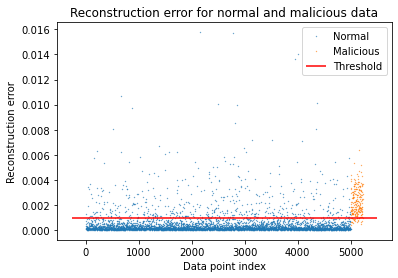

In [30]:
threshold_fixed = 0.001
val_x_predictions = model.predict(val_data)
mse = np.mean(np.power(val_data - val_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': labels_val})

groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=0.3, linestyle='',
            label= "Malicious" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and malicious data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index") 
plt.show();

In [31]:
reconstructions_a = model.predict(test_data)
test_loss = tf.keras.losses.mae(reconstructions_a, test_data)

In [103]:
prob_test = (test_loss-min(test_loss))/(max(test_loss)-min(test_loss))
precision, recall, thresholds = precision_recall_curve(labels_test,prob_test)
f1_scores = 2*recall*precision/(recall+precision)
f1_scores = np.nan_to_num(f1_scores)
print('Best threshold: ', thresholds[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))
threshold = thresholds[np.argmax(f1_scores)]

Best threshold:  0.4477726199290238
Best F1-Score:  0.40540540540540543


<ipython-input-103-fed8cf2a95a9>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = 2*recall*precision/(recall+precision)


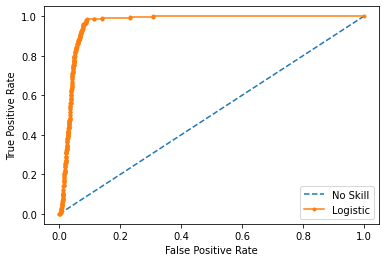

Best Threshold=0.251128, G-Mean=0.946


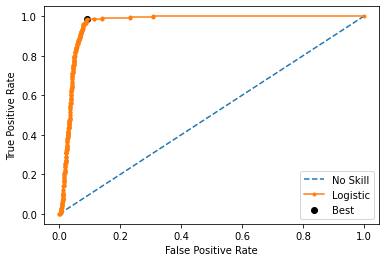

In [389]:
# feature scaling
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
prob_test = (test_loss-min(test_loss))/(max(test_loss)-min(test_loss))

fpr, tpr, thresholds = roc_curve(labels_test,prob_test)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

from numpy import sqrt
from numpy import argmax
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()
threshold = thresholds[ix]



In [32]:
threshold

0.20394239713520462

In [33]:
# Number of correct predictions for Normal test data  
prob_test = (test_loss-min(test_loss))/(max(test_loss)-min(test_loss))
print(roc_auc_score(labels_test, prob_test, average=None))
pred_test = [0 if prob_test[i] < threshold else 1 for i in range(len(prob_test))]
len(pred_test)

0.9602995918367347


5245

# original result

In [34]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
print("Test Evaluation")
print(roc_auc_score(labels_test, pred_test, average=None))
print(classification_report(labels_test ,pred_test,  labels=[0, 1]))
print(confusion_matrix(labels_test ,pred_test))

Test Evaluation
0.9378183673469388
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      5000
           1       0.29      0.99      0.45       245

    accuracy                           0.89      5245
   macro avg       0.65      0.94      0.70      5245
weighted avg       0.97      0.89      0.92      5245

[[4419  581]
 [   2  243]]


# improve with port profile

In [37]:
# add filter step

# open clustering profile
df_profile = pd.read_csv("/home/andrewngo/Desktop/MLTracker/server_profile_prop_labels_27.csv")
host_profile = df_profile[["profile_labels", "computer"]]
host_profile = host_profile.set_index('computer').to_dict()['profile_labels']


# create a dict of path and labels 
label_dict = dict()
for i in range(len(pred_test)):
    label_dict[test_data_path[i]] = i

path_to_index = convert_nodeid_to_user_CUC(label_dict, computer2nodeid, user2nodeid)
index_to_path = {path_to_index[i]:i for i in path_to_index}
# filter the false positive (bruce force)

new_pred = []
for i in range(len(pred_test)):
    if pred_test[i] == 1:
        try: 
            if host_profile[index_to_path[i][0]] == host_profile[index_to_path[i][2]]:
                new_pred.append(0)
            else:
                new_pred.append(pred_test[i])
        except:
            new_pred.append(pred_test[i])
    else:
        new_pred.append(pred_test[i])
temp = new_pred

new_pred = []
for i in range(len(pred_test)):
    if pred_test[i] == 1:
        try: 
            if host_profile[index_to_path[i][0]] == host_profile[index_to_path[i][2]]:
                new_pred.append(0)
            else:
                new_pred.append(pred_test[i])
        except:
            new_pred.append(pred_test[i])
    else:
        new_pred.append(pred_test[i])
        
        
        
        
        
        
# label_dict

In [38]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
print("Test Evaluation")
print(roc_auc_score(labels_test, new_pred, average=None))
print(classification_report(labels_test ,new_pred,  labels=[0, 1]))
print(confusion_matrix(labels_test ,new_pred))

Test Evaluation
0.9580367346938775
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      5000
           1       0.42      0.98      0.58       245

    accuracy                           0.93      5245
   macro avg       0.71      0.96      0.77      5245
weighted avg       0.97      0.93      0.95      5245

[[4662  338]
 [   4  241]]


In [39]:
# add filter step

# open clustering profile
df_profile = pd.read_csv("/home/andrewngo/Desktop/MLTracker/server_profile_prop_labels_30.csv")
host_profile = df_profile[["profile_labels", "computer"]]
host_profile = host_profile.set_index('computer').to_dict()['profile_labels']


# create a dict of path and labels 
label_dict = dict()
for i in range(len(pred_test)):
    label_dict[test_data_path[i]] = i

path_to_index = convert_nodeid_to_user_CUC(label_dict, computer2nodeid, user2nodeid)
index_to_path = {path_to_index[i]:i for i in path_to_index}
# filter the false positive (bruce force)

new_pred = []
for i in range(len(pred_test)):
    if pred_test[i] == 1:
        try: 
            if host_profile[index_to_path[i][0]] == host_profile[index_to_path[i][2]]:
                new_pred.append(0)
            else:
                new_pred.append(pred_test[i])
        except:
            new_pred.append(pred_test[i])
    else:
        new_pred.append(pred_test[i])
temp = new_pred

new_pred = []
for i in range(len(pred_test)):
    if pred_test[i] == 1:
        try: 
            if host_profile[index_to_path[i][0]] == host_profile[index_to_path[i][2]]:
                new_pred.append(0)
            else:
                new_pred.append(pred_test[i])
        except:
            new_pred.append(pred_test[i])
    else:
        new_pred.append(pred_test[i])
        
        
        
        
        
        
# label_dict

In [40]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
print("Test Evaluation")
print(roc_auc_score(labels_test, new_pred, average=None))
print(classification_report(labels_test ,new_pred,  labels=[0, 1]))
print(confusion_matrix(labels_test ,new_pred))

Test Evaluation
0.730965306122449
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5000
           1       0.29      0.53      0.37       245

    accuracy                           0.92      5245
   macro avg       0.63      0.73      0.66      5245
weighted avg       0.94      0.92      0.93      5245

[[4677  323]
 [ 116  129]]


# Evaluate

In [36]:
# find the false positive 
def false_positive_path(path, labels, pred, prob):
    return_path = dict()
    for i in range(len(pred)):
        if pred[i] == 0 and labels[i] == 1:
            return_path[path[i]] = float(prob[i])
    return return_path
def true_positive_path(path, labels, pred, prob):
    return_path = dict()
    for i in range(len(pred)):
        if pred[i] == 0 and labels[i] == 0:
            return_path[path[i]] = float(prob[i])
    return return_path
def false_negative_path(path, labels, pred, prob):
    return_path = dict()
    for i in range(len(pred)):
        if pred[i] == 1 and labels[i] == 0:
            return_path[path[i]] = float(prob[i])
    return return_path
def true_negative_path(path, labels, pred, prob):
    return_path = dict()
    for i in range(len(pred)):
        if pred[i] == 1 and labels[i] == 1:
            return_path[path[i]] = float(prob[i])
    return return_path


#convert nodeid to user
def convert_nodeid_to_user_CUC(path_list, computer2nodeid, user2nodeid):
    return_path = dict()
    nodeid2computer = {computer2nodeid[i]:i for i in computer2nodeid}
    nodeid2user = {user2nodeid[i]:i for i in user2nodeid}
    for i in path_list:
        i_convert = (nodeid2computer[i[0]], nodeid2user[i[1] - model_metapath2vec.start["User"]], nodeid2computer[i[2]])
        return_path[i_convert] = path_list[i]
    return return_path

In [81]:
false_positive_path_test = false_positive_path(test_data_path, labels_test, pred_test, prob_test)
false_negative_path_test = false_negative_path(test_data_path, labels_test, pred_test, prob_test)
true_positive_path_test = true_positive_path(test_data_path, labels_test, pred_test, prob_test)
true_negative_path_test = true_negative_path(test_data_path, labels_test, pred_test, prob_test)




false_negative_path_test = convert_nodeid_to_user_CUC(false_negative_path_test, computer2nodeid, user2nodeid)
false_positive_path_test = convert_nodeid_to_user_CUC(false_positive_path_test, computer2nodeid, user2nodeid)
true_negative_path_test = convert_nodeid_to_user_CUC(true_negative_path_test, computer2nodeid, user2nodeid)
true_positive_path_test = convert_nodeid_to_user_CUC(true_positive_path_test, computer2nodeid, user2nodeid)

test_result = dict()
test_result["false_negative"] = false_negative_path_test
test_result["false_positive"] = false_positive_path_test
test_result["true_negative"] = true_negative_path_test
test_result["true_positive"] = true_positive_path_test



In [82]:
test_result["false_negative"]

{('C1817', 'U1293', 'C528'): 0.2772018046647159,
 ('C449', 'U3576', 'C449'): 0.3129829884132889,
 ('C14455', 'U6478', 'C14455'): 0.24165305234236847,
 ('C449', 'U46', 'U20'): 0.27019812605319454,
 ('C449', 'U2869', 'C449'): 0.26036226700385373,
 ('C1737', 'U6215', 'C1737'): 0.3467866238369115,
 ('C7182', 'SYSTEM', 'C7182'): 0.20835166022737112,
 ('C18188', 'U307', 'C4759'): 0.2253422176991151,
 ('C15556', 'U7036', 'C15556'): 0.35885583637547613,
 ('C5439', 'U4366', 'C5439'): 0.23484517950132883,
 ('C6460', 'U920', 'C625'): 0.2103906360508302,
 ('C25076', 'U4195', 'C25076'): 0.3888955813422336,
 ('C8398', 'U4136', 'C2389'): 0.32884856744660185,
 ('C6005', 'U1907', 'C2008'): 0.24852256304804882,
 ('C10790', 'U3328', 'C467'): 0.2317223425198661,
 ('C1665', 'U7364', 'C1665'): 0.41967228652068567,
 ('C2651', 'U4279', 'C2651'): 0.25508695566892414,
 ('C15255', 'U6875', 'C15255'): 0.27936089516880275,
 ('C449', 'U1492', 'C449'): 0.2482707398558592,
 ('C346', 'U8721', 'C346'): 0.73858412937034

In [83]:
test_result["false_positive"]

{('C22409', 'U3486', 'C467'): 0.1389036169766751,
 ('C22409', 'U3486', 'C457'): 0.16172711305505497,
 ('C22409', 'U1653', 'C754'): 0.17273296483529976}

In [84]:
test_result["true_negative"]

{('C17693', 'U3005', 'C687'): 0.3819576687179561,
 ('C17693', 'U4448', 'C1555'): 0.5457153452579214,
 ('C17693', 'U66', 'C452'): 0.3729765505660609,
 ('C19932', 'U737', 'C467'): 0.24837655456619875,
 ('C17693', 'U218', 'C5653'): 0.39374475211672244,
 ('C17693', 'U342', 'C2519'): 0.49793072993881804,
 ('C17693', 'U3005', 'C78'): 0.35970332292483703,
 ('C17693', 'U24', 'C2378'): 0.5264175609091308,
 ('C17693', 'U2231', 'C1432'): 0.5070974388521925,
 ('C17693', 'U1569', 'C1632'): 0.34874532041221806,
 ('C17693', 'U13', 'C3288'): 0.5174974223540351,
 ('C17693', 'U66', 'C243'): 0.37151713619024435,
 ('C17693', 'U6691', 'C2079'): 0.2552626652523023,
 ('C17693', 'U207', 'C2388'): 0.43630124196786557,
 ('C17693', 'U4448', 'C22275'): 0.5682264802642525,
 ('C17693', 'U66', 'C2012'): 0.3109490144700083,
 ('C17693', 'U3635', 'C8209'): 0.43497195316113124,
 ('C17693', 'U66', 'C5439'): 0.3265707316857399,
 ('C17693', 'U114', 'C3610'): 0.44423740400141093,
 ('C17693', 'U3005', 'C506'): 0.417325374186

In [42]:
host_profile["C687"]

0

In [55]:
# add filter step

# open clustering profile
df_profile = pd.read_csv("/home/andrewngo/Desktop/MLTracker/server_profile_prop_labels_27.csv")
host_profile = df_profile[["profile_labels", "computer"]]
host_profile = host_profile.set_index('computer').to_dict()['profile_labels']


# create a dict of path and labels 
label_dict = dict()
for i in range(len(pred_test)):
    label_dict[test_data_path[i]] = i

path_to_index = convert_nodeid_to_user_CUC(label_dict, computer2nodeid, user2nodeid)
index_to_path = {path_to_index[i]:i for i in path_to_index}
# filter the false positive (bruce force)

new_pred = []
for i in range(len(pred_test)):
    if pred_test[i] == 1:
        try: 
            if host_profile[index_to_path[i][0]] == host_profile[index_to_path[i][2]]:
                new_pred.append(0)
            else:
                new_pred.append(pred_test[i])
        except:
            new_pred.append(pred_test[i])
    else:
        new_pred.append(pred_test[i])
temp = new_pred

new_pred = []
for i in range(len(pred_test)):
    if pred_test[i] == 1:
        try: 
            if host_profile[index_to_path[i][0]] == host_profile[index_to_path[i][2]]:
                new_pred.append(0)
            else:
                new_pred.append(pred_test[i])
        except:
            new_pred.append(pred_test[i])
    else:
        new_pred.append(pred_test[i])
        
        
        

KeyError: 'C452'

In [71]:
test_result["true_negative"]

{('C17693', 'U3005', 'C687'): 0.7222209473002159,
 ('C17693', 'U4448', 'C1555'): 0.7222209473002159,
 ('C17693', 'U66', 'C452'): 0.7222209473002159,
 ('C17693', 'U218', 'C5653'): 0.7222209473002159,
 ('C17693', 'U342', 'C2519'): 0.7222209473002159,
 ('C17693', 'U3005', 'C78'): 0.7222209473002159,
 ('C17693', 'U24', 'C2378'): 0.7222209473002159,
 ('C17693', 'U2231', 'C1432'): 0.7222209473002159,
 ('C17693', 'U1569', 'C1632'): 0.7222209473002159,
 ('C17693', 'U13', 'C3288'): 0.7222209473002159,
 ('C17693', 'U66', 'C243'): 0.7222209473002159,
 ('C17693', 'U6691', 'C2079'): 0.7222209473002159,
 ('C17693', 'U207', 'C2388'): 0.7222209473002159,
 ('C17693', 'U4448', 'C22275'): 0.7222209473002159,
 ('C17693', 'U66', 'C2012'): 0.7222209473002159,
 ('C17693', 'U3635', 'C8209'): 0.7222209473002159,
 ('C17693', 'U66', 'C5439'): 0.7222209473002159,
 ('C17693', 'U114', 'C3610'): 0.7222209473002159,
 ('C17693', 'U3005', 'C506'): 0.7222209473002159,
 ('C17693', 'U1025', 'C338'): 0.7222209473002159,
 (

In [111]:

test_result_dir = "test_result__outc2" + str(seed) + ".pkl"
with open(test_result_dir, 'wb') as f:
    pickle.dump(test_result, f)

In [109]:
# false_positive_path_test = convert_nodeid_to_user_CUC(false_positive_path_test, computer2nodeid, user2nodeid)
false_positive_path_test

{(13379, 16623, 8): 0.1353975935063848, (13379, 16623, 1): 0.15727336717722254}

In [110]:
threshold

0.15994453049122448

In [47]:
nodeid2computer = {computer2nodeid[i]:i for i in computer2nodeid}
len((nodeid2computer))

15425

In [ ]:
normal_train_dict = {out_normal_dict[i]:i for i in out_train_keys_sample}
normal_test_dict = {out_normal_dict[i]:i for i in out_test_keys_sample}
normal_val_dict = {out_normal_dict[i]:i for i in out_val_keys_sample}

mal_test_dict = {out_mal_test_dict[i]:i for i in out_mal_test_dict}
mal_val_dict = {out_mal_train_val_dict[i]:i for i in out_mal_train_val_dict}

data_dict = {}
data_dict = {**normal_train_dict, **normal_test_dict}
data_dict = {**data_dict, **normal_val_dict}
data_dict = {**data_dict, **mal_test_dict}
data_dict = {**data_dict, **mal_val_dict}


train_path = [data_dict[i] for i in normal_train_data]
# out_train_dict_sample = {out_normal_dict[i]:i for i in out_train_keys_sample}
train_path


In [461]:
temp = torch.Tensor(3,2)
temp

tensor([[-1.2710e-09,  3.0780e-41],
        [ 1.1244e-33,  3.0781e-41],
        [ 4.4842e-44,  0.0000e+00]])

In [236]:
for i in temp:
    print(i)

tensor([-1.3277e-22,  3.0780e-41])
tensor([-8.7377e-19,  3.0780e-41])
tensor([1.1210e-43, 0.0000e+00])


In [ ]:
# Training the model
history = model.fit(normal_train_data,normal_train_data,
                    epochs = 50,
                    batch_size = 128,
                    validation_data = (train_data_scaled[:,1:], train_data_scaled[:,1:]),
                    shuffle = True,
                    callbacks = [early_stopping])

In [39]:
# predictions for normal test data points
encoder_out = model.encoder(normal_val_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [40]:
encoder_out.shape

(4997, 8)

In [41]:
decoder_out.shape

(4997, 128)

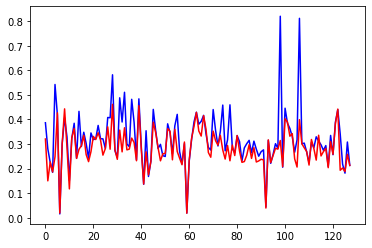

In [42]:
# plotting normal test data point and its predictiction by the autoencoder
plt.plot(normal_test_data[0], 'b')
plt.plot(decoder_out[0], 'r')

In [43]:
# predictions for anomaly test data points
encoder_out_a = model.encoder(mal_test_data).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

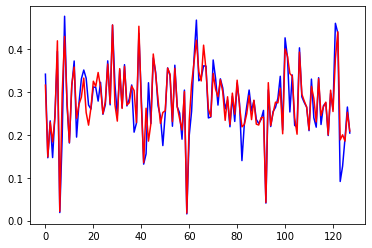

In [44]:
# plotting anomaly test data point and its predictiction by the autoencoder
plt.plot(mal_test_data[0], 'b')
plt.plot(decoder_out_a[0], 'r')

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]),
 array([0.00867242, 0.01720177, 0.02573112, 0.03426048, 0.04278983,
        0.05131919, 0.05984854, 0.06837789, 0.07690725, 0.0854366 ,
        0.09396596]),
 <a list of 4998 BarContainer objects>)

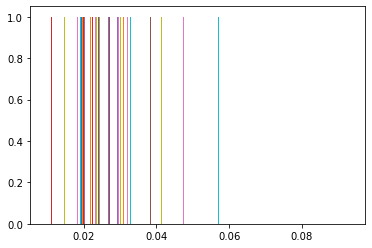

In [45]:
# reconstruction loss for normal test data
reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data)

# Plotting histogram for recontruction loss for normal test data
plt.hist(train_loss, bins = 10)

In [46]:
np.mean(train_loss)

0.024661725968090385

In [47]:
np.std(train_loss)

0.01050129499984465

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.01967302, 0.02231314, 0.02495327, 0.02759339, 0.03023351,
        0.03287363, 0.03551375, 0.03815387, 0.04079399, 0.04343412,
        0.04607424]),
 <a list of 159 BarContainer objects>)

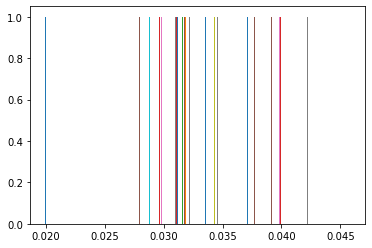

In [48]:
# reconstruction loss for anomaly test data
reconstructions_a = model.predict(mal_test_data)
train_loss_a = tf.keras.losses.mae(reconstructions_a, mal_test_data)

# Plotting histogram for recontruction loss for anomaly test data
plt.hist(train_loss_a, bins = 10)

In [55]:
np.mean(train_loss_a)

0.032920637652143814

In [54]:
np.std(train_loss_a)

0.0046078258096637174

In [53]:
np.mean(train_loss_a)

0.032920637652143814

In [52]:
# setting threshold
# threshold = np.mean(train_loss) + 2*np.std(train_loss)
threshold = (np.mean(train_loss) +np.mean(train_loss_a))/2
threshold

0.028791181810117097

0.028791181810117097

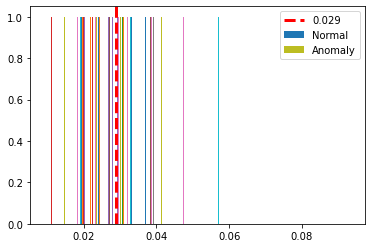

In [56]:
# Plotting the normal and anomaly losses with the threshold
plt.hist(train_loss, bins = 10, label = 'Normal')
plt.hist(train_loss_a, bins = 10, label = 'Anomaly')
plt.axvline(threshold, color='r', linewidth = 3, linestyle = 'dashed', label = '{:0.3f}'.format(threshold))
plt.legend(loc = 'upper right')
plt.show()

In [59]:
# Number of correct predictions for Normal test data  
preds = tf.math.less(train_loss, threshold)
preds

<tf.Tensor: shape=(4998,), dtype=bool, numpy=array([False, False,  True, ..., False,  True,  True])>

In [60]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=3821>

In [61]:
# Number of correct predictions for Anomaly test data 
preds_a = tf.math.greater(train_loss_a, threshold)

In [62]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=137>

In [63]:
preds_a.shape

TensorShape([159])